In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta as td
import pandas as pd
%matplotlib inline
import sys

#Make sure Python Analysis folder in in PYTHONPATH and import the mhdpy module
#PythonAnalysisPath = 'C:\\Users\\aspit\\Git\\MHDLab\\Analysis\\Python Analysis'
#if not PythonAnalysisPath in sys.path:
#    sys.path.append(PythonAnalysisPath)
#print(sys.path)

import easygui

from nptdms import TdmsFile as TF

import importlib

import mhdpy.load as load
import mhdpy.analysis as analysis

mpl.rcParams.update({'font.size': 18})

datafolder = "C:\\Users\\aspit\\OneDrive\\Data\\"

In [2]:
#filepaths_PL = easygui.fileopenbox(multiple=True,default = datafolder)
#filepaths_PL
filepaths_PL = ['C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\PIMAX_1_60C_10Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\PIMAX_1_60C_20Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\PIMAX_1_60C_50Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\PIMAX_1_60C_100Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\PIMAX_1_60C_200Hz.spe']

#filepaths_pow = easygui.fileopenbox(multiple=True,default = datafolder)
filepaths_pow = ['C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\Log_Powermeter_0_60C_10Hz_0.tdms',
 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\Log_Powermeter_0_60C_20Hz_0.tdms',
 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\Log_Powermeter_0_60C_50Hz_0.tdms',
 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\Log_Powermeter_0_60C_100Hz_0.tdms',
 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\Log_Powermeter_0_60C_200Hz_0.tdms']

#filepaths_T = easygui.fileopenbox(multiple=True,default = datafolder)
filepaths_T = ['C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\Log_TC1_0_cut_60C_10Hz_0.tdms',
 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\Log_TC1_0_cut_60C_20Hz_0.tdms',
 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\Log_TC1_0_cut_60C_50Hz_0.tdms',
 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\Log_TC1_0_cut_60C_100Hz_0.tdms',
 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\Log_TC1_0_cut_60C_200Hz_0.tdms']

dfs_PL = load.common.create_tcdict(filepaths_PL,load.spe.spe2df_spect,prefix = 'PIMAX_1_')
dfs_pow = load.common.create_tcdict(filepaths_pow,load.common.tdms2df,prefix = 'Log_Powermeter_0')
dfs_T = load.common.create_tcdict(filepaths_T,load.common.tdms2df,prefix = 'Log_TC1_0_cut_')

Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object


C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\nptdms\tdms.py:226: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  return pd.DataFrame.from_items(temp)


In [3]:
dfs_PL_cut = {}
for testcase in dfs_PL:
    dfs_PL_cut[testcase] = analysis.trpl.cutspectraldf(dfs_PL[testcase], 778,798)

reprates = [10,20,50,100,200]

# maximums = []
# for filename in dfs_PL_cut:
#     maximums.append(dfs_PL[filename].max()[0])
    
maximums = []

for testcase in dfs_PL_cut:
    maxtemp = []
    for idx in dfs_PL_cut[testcase].columns:
        maxtemp.append(dfs_PL_cut[testcase][idx].max())

    maximums.append(maxtemp)

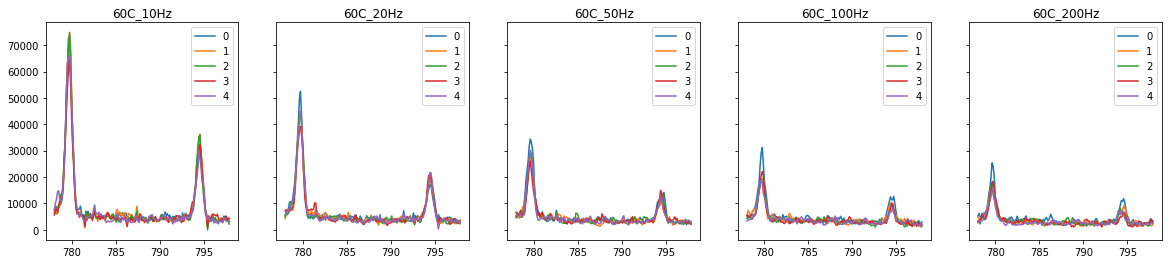

In [4]:
fig, ax = plt.subplots(1,5,sharey = True, figsize = (20,4))

i=0
for filename in dfs_PL_cut:   
    ax[i].plot(dfs_PL_cut[filename].index,dfs_PL_cut[filename])
    ax[i].set_title(filename)
    ax[i].legend(dfs_PL_cut[filename].columns)
    i=i+1

Text(0.5,0,'frame #')

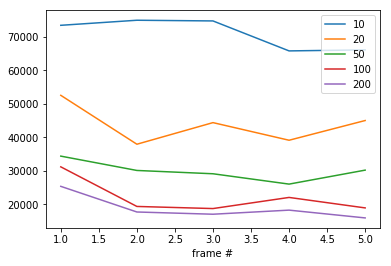

In [5]:
for maxarray in maximums:
    plt.plot([1,2,3,4,5],maxarray)
plt.legend(reprates)
plt.xlabel('frame #')

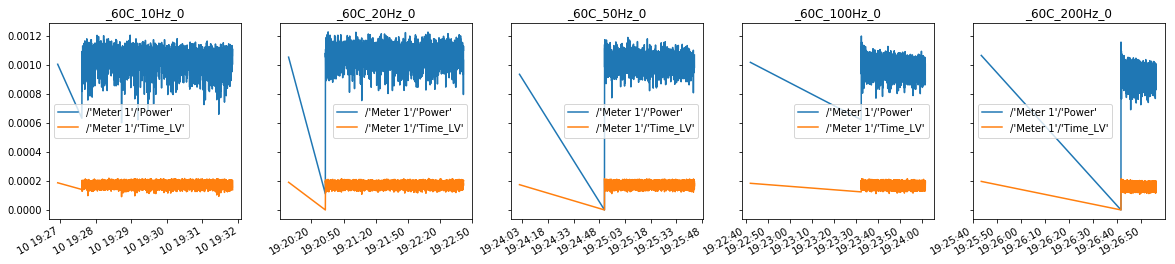

In [8]:
fig, ax = plt.subplots(1,5,sharey = True, figsize = (20,4))

i=0
for filename in dfs_pow:   
    ax[i].plot(dfs_pow[filename]['/\'Meter 1\'/\'Time_LV\''],dfs_pow[filename]['/\'Meter 1\'/\'Power\''])
    ax[i].plot(dfs_pow[filename]['/\'Meter 2\'/\'Time_LV\''],dfs_pow[filename]['/\'Meter 2\'/\'Power\''])
    ax[i].set_title(filename)
    ax[i].legend(dfs_pow[filename].columns)
    i=i+1
    
fig.autofmt_xdate()

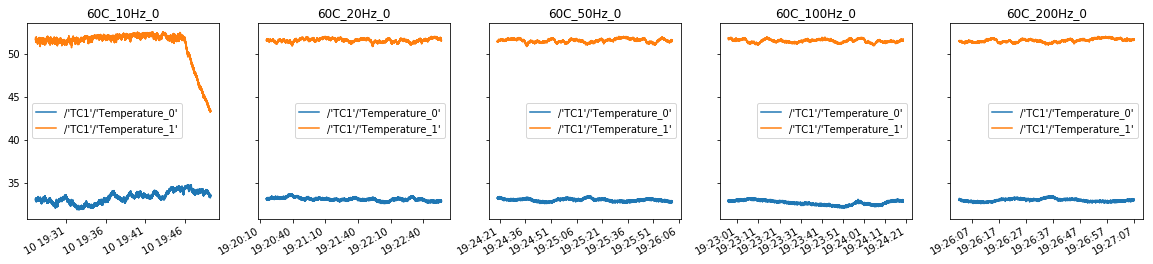

In [7]:
fig, ax = plt.subplots(1,5,sharey = True, figsize = (20,4))

i=0
for filename in dfs_T:   
    ax[i].plot(dfs_T[filename].index,dfs_T[filename]['/\'TC1\'/\'Temperature_1\''])
    ax[i].plot(dfs_T[filename].index,dfs_T[filename]['/\'TC1\'/\'Temperature_2\''])
    ax[i].set_title(filename)
    ax[i].legend(dfs_T[filename].columns)
    i=i+1
fig.autofmt_xdate()